In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [4]:
customer_data = pd.read_excel("/content/Chapter 2 DentMax Case Dataset version 2_4.xlsx")
X = customer_data.iloc[:, range(1,18)].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
customer_data

,Observations / Segmentation Variables,Time Spent at DentMax Booth,Time Spent at DentMed/OxyMax Booth,Total Time spent at show,% Buying from DentMax in the past,Historical Sales Index,Sales Frequency,Length of Relationship,Number of Referrals Offered,Importance of Image Quality,Importance of Diagnostic Flexibility,Importance of Software Intergation,Importance of Technical Assistance,Importance of Price,Trust in TV ads,Trust in Radio Ads,Trust in Internet Ads,Trust in Dental Magazine Ads,Trust in Peers
0,Respondent 1,12,22,150,32,21,3,4,1,5,5,5,6,7,5,5,4,5,6
1,Respondent 2,13,22,150,32,20,3,4,1,5,5,5,7,7,5,5,4,5,5
2,Respondent 3,12,21,150,32,22,3,4,1,5,5,5,6,7,5,5,4,6,6
3,Respondent 4,11,21,150,33,21,3,4,1,5,5,5,6,7,4,5,4,5,5
4,Respondent 5,12,21,150,32,21,3,4,1,5,5,5,7,7,5,4,4,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,Respondent 2296,12,21,150,32,21,3,4,1,5,5,5,6,7,5,5,4,6,5
2296,Respondent 2297,13,21,150,32,22,3,4,0,5,5,5,6,7,4,4,4,5,6
2297,Respondent 2298,35,78,180,46,64,5,9,2,6,6,6,6,6,4,5,6,6,7
2298,Respondent 2299,12,21,150,32,20,3,4,0,5,5,5,6,7,4,5,4,5,6


# Hierarchical Clustering (Ward's method)

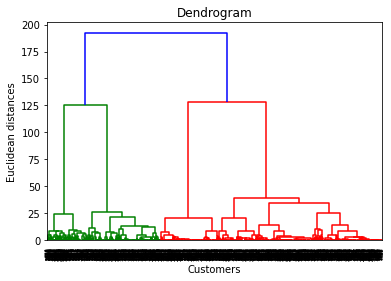

In [6]:
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [7]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(X)
y_hc

array([0, 0, 0, ..., 2, 0, 0])

# K-Means Clustering

In [8]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Inertia')

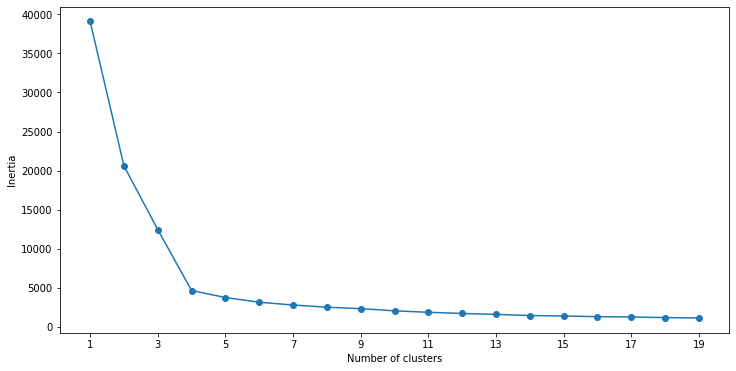

In [9]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(X_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1, 20, step=2))
plt.ylabel('Inertia')

# FACTOR ANALYSIS

In [10]:
!pip install factor_analyzer  
from factor_analyzer import FactorAnalyzer

     |████████████████████████████████| 40 kB 3.4 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40395 sha256=f08b8e52fb6b575d8285c85dbd54bb32cca9c7bd55754e08c88e13b15b6ea49c
  Stored in directory: /root/.cache/pip/wheels/8d/9e/4c/fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer


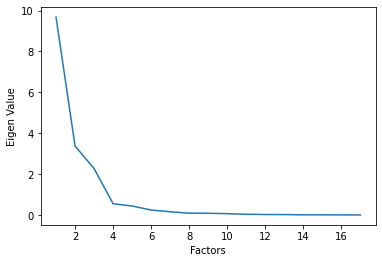

In [11]:
#Subset of the data, the 14 columns containing the survey answers
x =customer_data.iloc[:,range(1,18)] 
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.xlabel("Factors")
plt.ylabel("Eigen Value")
plt.plot(range(1,x.shape[1]+1),ev)

# Targeting

In [15]:
target_data = customer_data
target_data['cluster'] = y_hc
target_data = target_data.drop(['Observations / Segmentation Variables'], axis=1)
target_data

,Time Spent at DentMax Booth,Time Spent at DentMed/OxyMax Booth,Total Time spent at show,% Buying from DentMax in the past,Historical Sales Index,Sales Frequency,Length of Relationship,Number of Referrals Offered,Importance of Image Quality,Importance of Diagnostic Flexibility,Importance of Software Intergation,Importance of Technical Assistance,Importance of Price,Trust in TV ads,Trust in Radio Ads,Trust in Internet Ads,Trust in Dental Magazine Ads,Trust in Peers,cluster
0,12,22,150,32,21,3,4,1,5,5,5,6,7,5,5,4,5,6,0
1,13,22,150,32,20,3,4,1,5,5,5,7,7,5,5,4,5,5,0
2,12,21,150,32,22,3,4,1,5,5,5,6,7,5,5,4,6,6,0
3,11,21,150,33,21,3,4,1,5,5,5,6,7,4,5,4,5,5,0
4,12,21,150,32,21,3,4,1,5,5,5,7,7,5,4,4,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,12,21,150,32,21,3,4,1,5,5,5,6,7,5,5,4,6,5,0
2296,13,21,150,32,22,3,4,0,5,5,5,6,7,4,4,4,5,6,0
2297,35,78,180,46,64,5,9,2,6,6,6,6,6,4,5,6,6,7,2
2298,12,21,150,32,20,3,4,0,5,5,5,6,7,4,5,4,5,6,0


In [16]:
summed_target_data = target_data.groupby(['cluster']).mean()

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
summed_target_data_scaled = pd.DataFrame(scaler.fit_transform(summed_target_data), columns = summed_target_data.columns)
#summed_target_data = summed_target_data.reset_index()

In [18]:
summed_target_data_scaled

,Time Spent at DentMax Booth,Time Spent at DentMed/OxyMax Booth,Total Time spent at show,% Buying from DentMax in the past,Historical Sales Index,Sales Frequency,Length of Relationship,Number of Referrals Offered,Importance of Image Quality,Importance of Diagnostic Flexibility,Importance of Software Intergation,Importance of Technical Assistance,Importance of Price,Trust in TV ads,Trust in Radio Ads,Trust in Internet Ads,Trust in Dental Magazine Ads,Trust in Peers
0,0.153636,0.149293,0.750079,0.276934,0.217778,0.403645,0.000000,0.041925,0.368939,0.344517,0.440581,0.377094,0.964498,0.752806,0.725203,0.333422,0.497196,0.369062
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.953091,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.768780,1.000000,1.000000,0.415790,1.000000,0.655666,1.000000,0.172760,0.733814,0.501274,1.000000,0.313658,0.628798,0.252386,1.000000,1.000000,0.788751,1.000000
3,1.000000,0.223593,0.583195,1.000000,0.891176,1.000000,0.801410,1.000000,1.000000,1.000000,0.089201,0.000000,0.000000,1.000000,0.256982,0.258116,1.000000,0.492906


In [19]:
ge_matrix_data = pd.DataFrame(columns=['Financial_gain','Competitive_edge','Size'])
ge_matrix_data['Financial_gain'] = summed_target_data_scaled[['Historical Sales Index','Sales Frequency','Length of Relationship','Number of Referrals Offered']].mean(axis=1)*100
ge_matrix_data['Competitive_edge'] = summed_target_data[['Time Spent at DentMax Booth']].values/summed_target_data[['Total Time spent at show']].values*100
ge_matrix_data['Size'] = pd.DataFrame(target_data.cluster.value_counts(normalize=True)).sort_index()*100

In [20]:

ge_matrix_data

,Financial_gain,Competitive_edge,Size
0,16.583717,8.014904,49.0
1,23.827287,10.061365,17.0
2,70.710648,19.994072,22.0
3,92.314659,34.617207,12.0


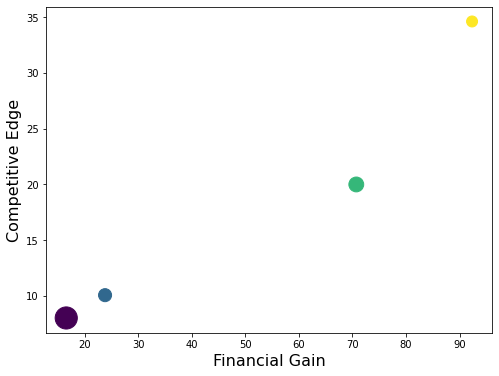

In [21]:
plt.figure(figsize=(8,6))

plt.xlabel("Financial Gain", size=16)
plt.ylabel("Competitive Edge", size=16)
scatter = plt.scatter(ge_matrix_data.Financial_gain, ge_matrix_data.Competitive_edge, c = ge_matrix_data.index, s=10*ge_matrix_data.Size)

plt.show()

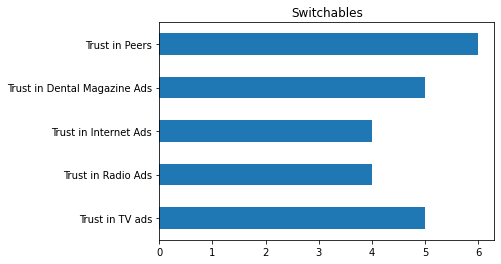

In [22]:
plot_data = target_data[target_data.cluster == 0]
p = plot_data[['Trust in TV ads','Trust in Radio Ads','Trust in Internet Ads','Trust in Dental Magazine Ads','Trust in Peers']].mode()
p.loc[0].plot(kind = 'barh', title = 'Switchables')

# Positioning

In [23]:
interested_segment_data = target_data[target_data.cluster == 2]

In [24]:
interested_segment_data

,Time Spent at DentMax Booth,Time Spent at DentMed/OxyMax Booth,Total Time spent at show,% Buying from DentMax in the past,Historical Sales Index,Sales Frequency,Length of Relationship,Number of Referrals Offered,Importance of Image Quality,Importance of Diagnostic Flexibility,Importance of Software Intergation,Importance of Technical Assistance,Importance of Price,Trust in TV ads,Trust in Radio Ads,Trust in Internet Ads,Trust in Dental Magazine Ads,Trust in Peers,cluster
5,36,78,180,45,64,5,9,2,6,5,6,6,6,4,5,6,6,7,2
9,36,79,179,45,64,4,9,2,6,6,7,6,6,5,4,6,6,7,2
17,35,78,180,45,64,5,9,2,6,6,7,6,6,4,5,6,6,7,2
18,37,78,181,45,65,4,9,2,6,5,6,6,6,4,5,6,6,7,2
20,36,78,180,45,63,5,9,2,6,5,7,6,6,4,5,6,6,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,36,78,180,45,64,4,9,2,6,6,6,6,6,5,5,6,6,7,2
2282,36,78,181,46,63,4,9,2,6,6,7,6,6,4,5,6,6,7,2
2284,36,78,180,44,64,4,9,2,6,6,6,6,6,5,4,6,6,6,2
2287,36,78,181,45,63,4,9,2,6,6,7,6,6,4,5,6,6,7,2


In [25]:
interested_segment_data = interested_segment_data[['Importance of Image Quality','Importance of Diagnostic Flexibility','Importance of Software Intergation','Importance of Technical Assistance']].apply(pd.Series.value_counts)

In [26]:
interested_segment_data = interested_segment_data.fillna(0)

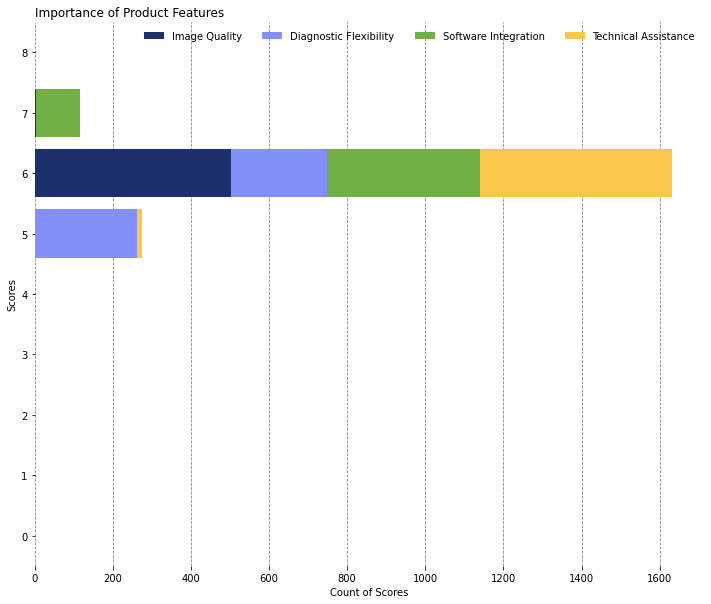

In [27]:
fields = ['Importance of Image Quality','Importance of Diagnostic Flexibility','Importance of Software Intergation','Importance of Technical Assistance']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['Image Quality', 'Diagnostic Flexibility', 'Software Integration', 'Technical Assistance']
# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
left = len(interested_segment_data) * [0]
for idx, name in enumerate(fields):
    plt.barh(interested_segment_data.index, interested_segment_data[name], left = left, color=colors[idx])
    left = left + interested_segment_data[name]
# title, legend, labels
plt.title('Importance of Product Features', loc='left')
plt.legend(labels, ncol=4, frameon=False)
plt.xlabel('Count of Scores')
plt.ylabel('Scores')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()